In [ ]:
##keras and tensorflow

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.shape

(2035, 8)

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1.shape

(2035,)

In [ ]:
import matplotlib.pyplot as plt

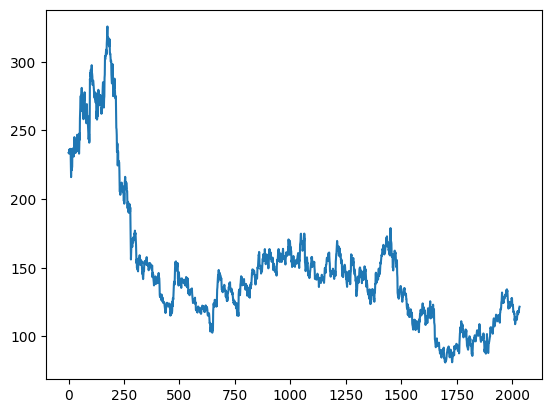

In [ ]:
plt.plot(df1)

LSTM are sensitive to the scale of data so need to transform the values

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
df2=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df2.shape

(2035, 1)

In [ ]:
df2

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Time series data:
data must be divided based on date and take it in training data and remaining will be in test. Reason is because the next day stock price are predicted using previous one.

In [ ]:
sizetr=int(len(df2)*0.65)
sizetest=len(df2)-sizetr
train_data,test_data=df2[0:sizetr,:],df2[sizetr:len(df2),:1]

In [ ]:
sizetr,sizetest

(1322, 713)

In [ ]:
train_data,test_data

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.25347222],
        [0.26041667],
        [0.2563317 ]]),
 array([[0.24652778],
        [0.23611111],
        [0.25204248],
        [0.25919118],
        [0.25776144],
        [0.2681781 ],
        [0.25449346],
        [0.27103758],
        [0.24530229],
        [0.26756536],
        [0.27267157],
        [0.26633987],
        [0.27410131],
        [0.28615196],
        [0.27818627],
        [0.27205882],
        [0.27124183],
        [0.27798203],
        [0.27083333],
        [0.25857843],
        [0.24285131],
        [0.2250817 ],
        [0.23447712],
        [0.24346405],
        [0.23611111],
        [0.22937092],
        [0.21527778],
        [0.20976307],
        [0.20751634],
        [0.2060866 ],
        [0.20445261],
        [0.20098039],
        [0.21180556],
        [0.19301471],
        [0.18974673],
        [0.20302288],
        [0.21752451],
        [0.20629085],
        [0.191584

In [ ]:
import numpy 


In [ ]:
def create_set(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step=100
X_train,Y_train=create_set(train_data,time_step)
X_test,Y_test=create_set(test_data,time_step)

In [ ]:
print(X_train),print(X_train.shape),print(Y_train.shape)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]
(1221, 100)
(1221,)


(None, None, None)

In [ ]:
print(X_test),print(X_test.shape),print(Y_test.shape)

[[0.24652778 0.23611111 0.25204248 ... 0.34681373 0.3500817  0.32618464]
 [0.23611111 0.25204248 0.25919118 ... 0.3500817  0.32618464 0.32271242]
 [0.25204248 0.25919118 0.25776144 ... 0.32618464 0.32271242 0.3247549 ]
 ...
 [0.13827614 0.13541667 0.13010621 ... 0.14562908 0.15236928 0.15400327]
 [0.13541667 0.13010621 0.12254902 ... 0.15236928 0.15400327 0.14971405]
 [0.13010621 0.12254902 0.12479575 ... 0.15400327 0.14971405 0.1621732 ]]
(612, 100)
(612,)


(None, None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='sorenson_dice')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

20/20 [==============================] - 0s 24ms/step


In [ ]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_pred))

82.85137323051069

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_pred))


81.69579608445024

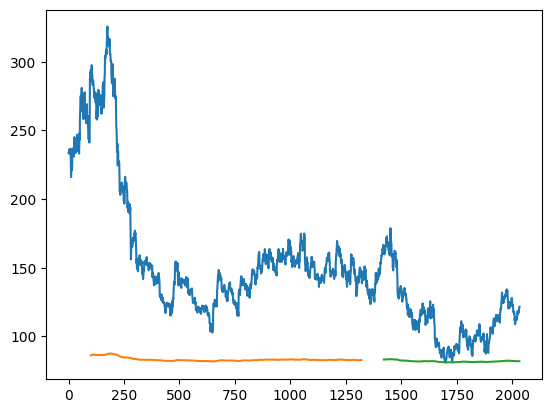

In [ ]:
look_back=100
trainPredPlot=numpy.empty_like(df2)
trainPredPlot[:,:]=np.nan
trainPredPlot[look_back:len(train_pred)+look_back,:]=train_pred

testPredPlot=numpy.empty_like(df2)
testPredPlot[:,:]=numpy.nan
testPredPlot[len(train_pred)+(look_back*2)+1:len(df2)-1,:]=test_pred

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()



In [ ]:
len(test_data)

713

In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.00819633]
101
1 day input [ 0.13848039  0.14011438  0.13888889  0.13541667  0.14011438  0.1380719
  0.13071895  0.13071895  0.12867647  0.11846405  0.14644608  0.14808007
  0.15910948  0.15992647  0.15788399  0.16441993  0.17892157  0.17933007
  0.19260621  0.20812908  0.18974673  0.18055556  0.18239379  0.17708333
  0.17810458  0.18055556  0.17810458  0.17851307  0.19607843  0.18913399
  0.18954248  0.19403595  0.19444444  0.20200163  0.19771242  0.19934641
  0.19873366  0.1997549   0.2128268   0.21568627  0.20445261  0.21772876
  0.21098856  0.21425654  0.19750817  0.18811275  0.17851307  0.17381536
  0.16033497  0.16564542  0.17116013  0.17422386  0.18035131  0.17401961
  0.16278595  0.16973039  0.17810458  0.17034314  0.16830065  0.17279412
  0.17544935  0.18382353  0.19138072  0.18913399  0.19097222  0.17238562
  0.16830065  0.1693219   0.17177288  0.16156046  0.14971405  0.1503268
  0.15196078  0.14726307  0.14501634  0.14603758  0.12479575  0.13112745
  0.11397059  0.1190768

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [ ]:
df3=df2.tolist()
df3.extend(lst_output)

In [ ]:
len(df2)

2035

In [ ]:
len(df2[1035:])

1000

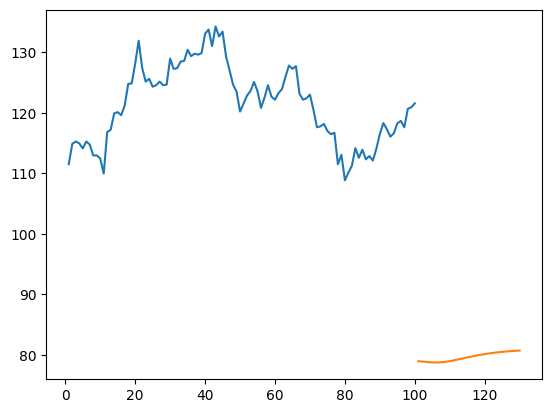

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df2[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

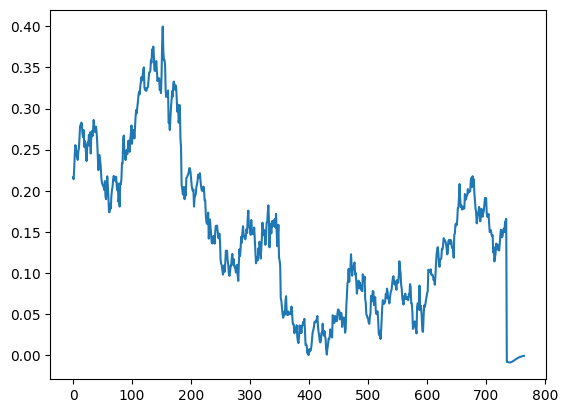

In [ ]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1300:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

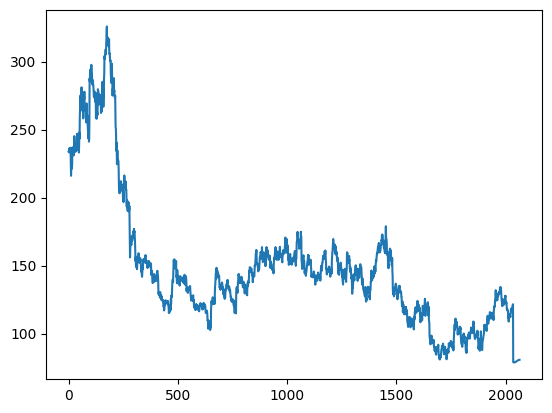

In [ ]:
plt.plot(df3)